In [1]:
import os
import torch
from torch import nn
from PIL import Image
import torch.nn.functional as F
from clipseg_model import CLIPSeg

In [2]:
state_dict = torch.load('checkpoints/clipseg_ft_VA_L_F_D_voc.pth', map_location='cpu')
clip_seg = CLIPSeg()
clip_seg.load_state_dict(state_dict['model'])

Some weights of CLIPSegForImageSegmentation were not initialized from the model checkpoint at CIDAS/clipseg-rd64-refined and are newly initialized: ['non_object_embedding', 'text_adapter.fc.0.weight', 'text_adapter.fc.2.weight', 'tunable_linear.weight', 'visual_adapter.fc.0.weight', 'visual_adapter.fc.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [3]:
img_dir = 'datasets/CUB_200_2011/images/001.Black_footed_Albatross/'
fn = os.listdir('datasets/CUB_200_2011/images/001.Black_footed_Albatross/')[0]

In [4]:
clip_seg.test_class_texts[11:20]

["bird's wing",
 "bird's tail",
 "bird's head",
 "bird's eye",
 "bird's beak",
 "bird's torso",
 "bird's neck",
 "bird's leg",
 "bird's foot"]

In [9]:
clip_seg.eval()
with torch.no_grad():
    inputs = {'file_name': os.path.join(img_dir, fn),'sem_seg': torch.tensor([2])}
    out = clip_seg.inference([inputs])

no_training
gt_objs: ['bird']
no_part_ids [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]
preds.shape: torch.Size([116, 441, 500])


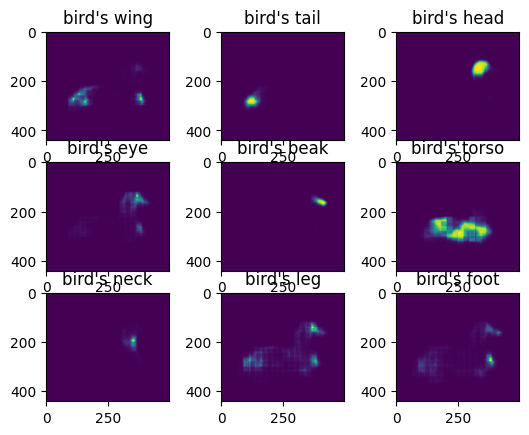

In [21]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,3)
for ax, score_map, part_name in zip(axes.flatten(), out[0]['sem_seg'][11:20].numpy(), clip_seg.test_class_texts[11:20]):
    ax.imshow(score_map)
    ax.title.set_text(part_name)

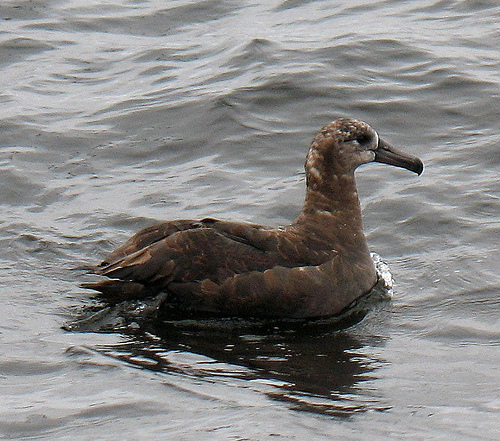

In [22]:
Image.open(os.path.join(img_dir, fn))

In [10]:
from clipseg_model import OBJ_CLASS_NAMES, PARTS_NAMES, BASE_PARTS_NAMES
len(OBJ_CLASS_NAMES), len(PARTS_NAMES), len(BASE_PARTS_NAMES)

(20, 116, 74)